In [333]:
import pandas as pd
import numpy as np

In [334]:
df = pd.read_csv('train1.csv') 

In [335]:
print(df.head(100))

    User_ID Product_ID Gender    Age  Occupation City_Category  \
0   1000001  P00069042      F   0-17          10             A   
1   1000001  P00248942      F   0-17          10             A   
2   1000001  P00087842      F   0-17          10             A   
3   1000001  P00085442      F   0-17          10             A   
4   1000002  P00285442      M    55+          16             C   
5   1000003  P00193542      M  26-35          15             A   
6   1000004  P00184942      M  46-50           7             B   
7   1000004  P00346142      M  46-50           7             B   
8   1000004   P0097242      M  46-50           7             B   
9   1000005  P00274942      M  26-35          20             A   
10  1000005  P00251242      M  26-35          20             A   
11  1000005  P00014542      M  26-35          20             A   
12  1000005  P00031342      M  26-35          20             A   
13  1000005  P00145042      M  26-35          20             A   
14  100000

In [336]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 12 columns):
User_ID                       65499 non-null int64
Product_ID                    65499 non-null object
Gender                        65499 non-null object
Age                           65499 non-null object
Occupation                    65499 non-null int64
City_Category                 65499 non-null object
Stay_In_Current_City_Years    65499 non-null object
Marital_Status                65499 non-null int64
Product_Category_1            65499 non-null int64
Product_Category_2            44908 non-null float64
Product_Category_3            19886 non-null float64
Purchase                      65499 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 6.0+ MB
None


In [337]:
# From examing data in previous two lines it is evident that there is missing values in  
# columns Product_Category_2 and Product_Category_3
# The Below script iterates through the columns of the dataframe, locates null values, 
# And sums all instances of a null value. If the column contains at least one null value
# Then it sets all instances of the Nan value to 0

for column in df:
    print(column)
    isnul = df[column].isnull()
    totalNull = sum(isnul)
    print(totalNull)
    if totalNull != 0:
        df[column][isnul] = 0
        isnul = df[column].isnull()
        totalNull = sum(isnul)
        print(totalNull)

User_ID
0
Product_ID
0
Gender
0
Age
0
Occupation
0
City_Category
0
Stay_In_Current_City_Years
0
Marital_Status
0
Product_Category_1
0
Product_Category_2
20591
0
Product_Category_3


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


45613
0
Purchase
0


In [338]:
# Checks that all Nan values have been replaced with 0
print(df[['Product_Category_2', 'Product_Category_3']])

       Product_Category_2  Product_Category_3
0                     0.0                 0.0
1                     6.0                14.0
2                     0.0                 0.0
3                    14.0                 0.0
4                     0.0                 0.0
5                     2.0                 0.0
6                     8.0                17.0
7                    15.0                 0.0
8                    16.0                 0.0
9                     0.0                 0.0
10                   11.0                 0.0
11                    0.0                 0.0
12                    0.0                 0.0
13                    2.0                 5.0
14                    8.0                14.0
15                    5.0                 0.0
16                    3.0                 4.0
17                   14.0                 0.0
18                   14.0                16.0
19                    5.0                15.0
20                   14.0         

In [339]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Example of hot one encoding 

[How To Hot One Encode Sequence Data In Python](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python// "Title")

In [340]:
# The next four sections of code are from an online example on how to hot one encode data
# I learned how this code works by running each section and then in later rows apply it to my data
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)
print(type(values))

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
<class 'numpy.ndarray'>


In [341]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[0 0 2 0 1 1 2 0 2 1]


In [342]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]


In [343]:
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['cold']


# Hot One Encoding My Data Based On the Example

## Hot One Encoding Gender

In [344]:
# Define an array containing gender column data from df
gender = array(df['Gender']) 

In [345]:
# integer encode the gender data from the gender array
label_encoder = LabelEncoder()
gender_integer_encoded = label_encoder.fit_transform(gender)
print(gender_integer_encoded)

[0 0 0 ..., 1 1 1]


In [346]:
# binary encode the gender data from the integer encoded data
onehot_encoder = OneHotEncoder(sparse=False)
gender_integer_encoded = gender_integer_encoded.reshape(len(gender_integer_encoded), 1)
gender_onehot_encoded = onehot_encoder.fit_transform(gender_integer_encoded)
print(gender_onehot_encoded)
print(type(gender_onehot_encoded))

[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]
<class 'numpy.ndarray'>


In [347]:
# Converts the hot one encoded data into a dataframe with columns 'F' for female and 'M' for male
dfGender = pd.DataFrame(data=gender_onehot_encoded, columns=['F','M'])
print(dfGender)

         F    M
0      1.0  0.0
1      1.0  0.0
2      1.0  0.0
3      1.0  0.0
4      0.0  1.0
5      0.0  1.0
6      0.0  1.0
7      0.0  1.0
8      0.0  1.0
9      0.0  1.0
10     0.0  1.0
11     0.0  1.0
12     0.0  1.0
13     0.0  1.0
14     1.0  0.0
15     1.0  0.0
16     1.0  0.0
17     1.0  0.0
18     0.0  1.0
19     0.0  1.0
20     0.0  1.0
21     0.0  1.0
22     0.0  1.0
23     0.0  1.0
24     0.0  1.0
25     0.0  1.0
26     0.0  1.0
27     0.0  1.0
28     0.0  1.0
29     1.0  0.0
...    ...  ...
65469  0.0  1.0
65470  0.0  1.0
65471  0.0  1.0
65472  0.0  1.0
65473  0.0  1.0
65474  0.0  1.0
65475  0.0  1.0
65476  0.0  1.0
65477  0.0  1.0
65478  0.0  1.0
65479  0.0  1.0
65480  0.0  1.0
65481  0.0  1.0
65482  0.0  1.0
65483  0.0  1.0
65484  0.0  1.0
65485  0.0  1.0
65486  0.0  1.0
65487  0.0  1.0
65488  0.0  1.0
65489  0.0  1.0
65490  0.0  1.0
65491  0.0  1.0
65492  0.0  1.0
65493  0.0  1.0
65494  0.0  1.0
65495  0.0  1.0
65496  0.0  1.0
65497  0.0  1.0
65498  0.0  1.0

[65499 

## Hot One Encoding Age

In [348]:
# Define an array containing age column data from df
ageArray = array(df['Age'])

In [349]:
# integer encode the gender data from the age array
label_encoder = LabelEncoder()
age_integer_encoded = label_encoder.fit_transform(ageArray)
print(age_integer_encoded)

[0 0 0 ..., 2 2 2]


In [350]:
# binary encode the age data from the integer encoded data
onehot_encoder = OneHotEncoder(sparse=False)
age_integer_encoded = age_integer_encoded.reshape(len(age_integer_encoded), 1)
age_onehot_encoded = onehot_encoder.fit_transform(age_integer_encoded)
print(age_onehot_encoded)

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]]


In [351]:
#Creates a set of column titles based on the age range categories
ageColumns = set(df['Age'])
ageColumns = list(ageColumns)
ageColumns.sort()
print(ageColumns)

['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']


In [352]:
# Converts the hot one encoded data into a dataframe with columns created in previous row
dfAge = pd.DataFrame(data=age_onehot_encoded, columns=ageColumns)
print(dfAge)

       0-17  18-25  26-35  36-45  46-50  51-55  55+
0       1.0    0.0    0.0    0.0    0.0    0.0  0.0
1       1.0    0.0    0.0    0.0    0.0    0.0  0.0
2       1.0    0.0    0.0    0.0    0.0    0.0  0.0
3       1.0    0.0    0.0    0.0    0.0    0.0  0.0
4       0.0    0.0    0.0    0.0    0.0    0.0  1.0
5       0.0    0.0    1.0    0.0    0.0    0.0  0.0
6       0.0    0.0    0.0    0.0    1.0    0.0  0.0
7       0.0    0.0    0.0    0.0    1.0    0.0  0.0
8       0.0    0.0    0.0    0.0    1.0    0.0  0.0
9       0.0    0.0    1.0    0.0    0.0    0.0  0.0
10      0.0    0.0    1.0    0.0    0.0    0.0  0.0
11      0.0    0.0    1.0    0.0    0.0    0.0  0.0
12      0.0    0.0    1.0    0.0    0.0    0.0  0.0
13      0.0    0.0    1.0    0.0    0.0    0.0  0.0
14      0.0    0.0    0.0    0.0    0.0    1.0  0.0
15      0.0    0.0    0.0    0.0    0.0    1.0  0.0
16      0.0    0.0    0.0    0.0    0.0    1.0  0.0
17      0.0    0.0    0.0    0.0    0.0    1.0  0.0
18      0.0 

## Hot One Encoding Occupation

In [353]:
# Define an array containing occupation column data from df
occupationArray = array(df['Occupation'])
print(occupationArray)

[10 10 10 ...,  4  4  4]


In [354]:
# binary encode the occupation data directly because its raw form was integer encoded
onehot_encoder = OneHotEncoder(sparse=False)
occupation_integer_encoded = occupationArray.reshape(len(occupationArray), 1)
occupation_onehot_encoded = onehot_encoder.fit_transform(occupation_integer_encoded)
print(occupation_onehot_encoded)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [355]:
#Creates a set of column titles based on the occupation categories
occupationColumns = set(df['Occupation'])
occupationColumns = list(occupationColumns)
occupationColumns.sort()
hold = []
for item in occupationColumns:
    temp = str(item) + '_Occupation'
    hold.append(temp)

print(type(hold))
print(hold)

<class 'list'>
['0_Occupation', '1_Occupation', '2_Occupation', '3_Occupation', '4_Occupation', '5_Occupation', '6_Occupation', '7_Occupation', '8_Occupation', '9_Occupation', '10_Occupation', '11_Occupation', '12_Occupation', '13_Occupation', '14_Occupation', '15_Occupation', '16_Occupation', '17_Occupation', '18_Occupation', '19_Occupation', '20_Occupation']


In [356]:
# Converts the hot one encoded data into a dataframe with columns created in previous row
dfOccupation = pd.DataFrame(data=occupation_onehot_encoded, columns= hold)
print(dfOccupation)

       0_Occupation  1_Occupation  2_Occupation  3_Occupation  4_Occupation  \
0               0.0           0.0           0.0           0.0           0.0   
1               0.0           0.0           0.0           0.0           0.0   
2               0.0           0.0           0.0           0.0           0.0   
3               0.0           0.0           0.0           0.0           0.0   
4               0.0           0.0           0.0           0.0           0.0   
5               0.0           0.0           0.0           0.0           0.0   
6               0.0           0.0           0.0           0.0           0.0   
7               0.0           0.0           0.0           0.0           0.0   
8               0.0           0.0           0.0           0.0           0.0   
9               0.0           0.0           0.0           0.0           0.0   
10              0.0           0.0           0.0           0.0           0.0   
11              0.0           0.0           0.0     

## Hot One Encoding City Category

In [357]:
# Define an array containing city category column data from df
city_catArray = array(df['City_Category'])

In [358]:
# integer encode the city category data
label_encoder = LabelEncoder()
city_cat_integer_encoded = label_encoder.fit_transform(city_catArray)
print(city_cat_integer_encoded)

[0 0 0 ..., 0 0 0]


In [359]:
# binary encode the integer encoded data from previous step
city_cat_onehot_encoder = OneHotEncoder(sparse=False)
city_cat_integer_encoded = city_cat_integer_encoded.reshape(len(city_cat_integer_encoded), 1)
city_cat_onehot_encoded = onehot_encoder.fit_transform(city_cat_integer_encoded)
print(city_cat_onehot_encoded)

[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 ..., 
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]


In [360]:
# creates column names for the city categories
City_Cat_Columns = set(df['City_Category'])
City_Cat_Columns = list(City_Cat_Columns)
City_Cat_Columns.sort()
print(City_Cat_Columns)

['A', 'B', 'C']


In [361]:
# creates a data frame out of the one hot encoded data with column titles created in previous step
dfCityCat = pd.DataFrame(data=city_cat_onehot_encoded, columns=City_Cat_Columns)
print(dfCityCat)

         A    B    C
0      1.0  0.0  0.0
1      1.0  0.0  0.0
2      1.0  0.0  0.0
3      1.0  0.0  0.0
4      0.0  0.0  1.0
5      1.0  0.0  0.0
6      0.0  1.0  0.0
7      0.0  1.0  0.0
8      0.0  1.0  0.0
9      1.0  0.0  0.0
10     1.0  0.0  0.0
11     1.0  0.0  0.0
12     1.0  0.0  0.0
13     1.0  0.0  0.0
14     1.0  0.0  0.0
15     1.0  0.0  0.0
16     1.0  0.0  0.0
17     1.0  0.0  0.0
18     0.0  1.0  0.0
19     0.0  0.0  1.0
20     0.0  0.0  1.0
21     0.0  0.0  1.0
22     0.0  0.0  1.0
23     0.0  0.0  1.0
24     0.0  0.0  1.0
25     0.0  0.0  1.0
26     0.0  0.0  1.0
27     0.0  0.0  1.0
28     0.0  0.0  1.0
29     0.0  1.0  0.0
...    ...  ...  ...
65469  1.0  0.0  0.0
65470  1.0  0.0  0.0
65471  1.0  0.0  0.0
65472  1.0  0.0  0.0
65473  1.0  0.0  0.0
65474  1.0  0.0  0.0
65475  1.0  0.0  0.0
65476  1.0  0.0  0.0
65477  1.0  0.0  0.0
65478  1.0  0.0  0.0
65479  1.0  0.0  0.0
65480  1.0  0.0  0.0
65481  1.0  0.0  0.0
65482  1.0  0.0  0.0
65483  1.0  0.0  0.0
65484  1.0  0

# Merging Data Frames of One Hot Encoded Data

In [362]:
# creates a single dataframe with the original data frame and all of the hot one encoded data concatenated
df2 = pd.concat([df, dfGender, dfAge, dfOccupation, dfCityCat], axis=1, join='inner')

In [363]:
print(df2)

       User_ID Product_ID Gender    Age  Occupation City_Category  \
0      1000001  P00069042      F   0-17          10             A   
1      1000001  P00248942      F   0-17          10             A   
2      1000001  P00087842      F   0-17          10             A   
3      1000001  P00085442      F   0-17          10             A   
4      1000002  P00285442      M    55+          16             C   
5      1000003  P00193542      M  26-35          15             A   
6      1000004  P00184942      M  46-50           7             B   
7      1000004  P00346142      M  46-50           7             B   
8      1000004   P0097242      M  46-50           7             B   
9      1000005  P00274942      M  26-35          20             A   
10     1000005  P00251242      M  26-35          20             A   
11     1000005  P00014542      M  26-35          20             A   
12     1000005  P00031342      M  26-35          20             A   
13     1000005  P00145042      M  

In [364]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 45 columns):
User_ID                       65499 non-null int64
Product_ID                    65499 non-null object
Gender                        65499 non-null object
Age                           65499 non-null object
Occupation                    65499 non-null int64
City_Category                 65499 non-null object
Stay_In_Current_City_Years    65499 non-null object
Marital_Status                65499 non-null int64
Product_Category_1            65499 non-null int64
Product_Category_2            65499 non-null float64
Product_Category_3            65499 non-null float64
Purchase                      65499 non-null int64
F                             65499 non-null float64
M                             65499 non-null float64
0-17                          65499 non-null float64
18-25                         65499 non-null float64
26-35                         65499 non-null float64
36-45

## Split Data into train (75%) and test (25%) data sets


In [365]:
# Creates location markers for splitting the data frame into a train portion and a test portion
trainDataEndLoc = int(len(df2)*.75)
testDataStartLoc = trainDataEndLoc + 1

In [366]:
# Uses location marker to create train data set
trainDf = df2.iloc[0:trainDataEndLoc,:]
print(trainDf.head(10))
print(trainDf.info())

   User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000001  P00069042      F   0-17          10             A   
1  1000001  P00248942      F   0-17          10             A   
2  1000001  P00087842      F   0-17          10             A   
3  1000001  P00085442      F   0-17          10             A   
4  1000002  P00285442      M    55+          16             C   
5  1000003  P00193542      M  26-35          15             A   
6  1000004  P00184942      M  46-50           7             B   
7  1000004  P00346142      M  46-50           7             B   
8  1000004   P0097242      M  46-50           7             B   
9  1000005  P00274942      M  26-35          20             A   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3           

In [367]:
# Uses location marker to create test data portion
testDf = df2.iloc[0:testDataStartLoc,:]
print(testDf.head(10))
print(testDf.info())

   User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000001  P00069042      F   0-17          10             A   
1  1000001  P00248942      F   0-17          10             A   
2  1000001  P00087842      F   0-17          10             A   
3  1000001  P00085442      F   0-17          10             A   
4  1000002  P00285442      M    55+          16             C   
5  1000003  P00193542      M  26-35          15             A   
6  1000004  P00184942      M  46-50           7             B   
7  1000004  P00346142      M  46-50           7             B   
8  1000004   P0097242      M  46-50           7             B   
9  1000005  P00274942      M  26-35          20             A   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3           

In [368]:
# Create three empty 20 x 49125 array
# Loop over product_cat_x 
# Turns corresponding array value to True 
# Adds three arrays together 

In [369]:
trainDf.Product_Category_2 = trainDf.Product_Category_2.astype(int)
#print(trainDf.Product_Category_2)
trainDf.Product_Category_3 = trainDf.Product_Category_3.astype(int)
#print(trainDf.Product_Category_3)

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [370]:
# Creates three empty arrays with equivalent rows as the data frame and 
# Eighteen columns to represent each category of product 
x = []
Product_Category_List = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']
for i in range(3):
    temp = np.zeros((49125, 18))
    x.append(temp)

print(x)

[array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])]


In [371]:
# Iterates over each entry in the product category column x and 
# Sets the corresponding entry in the empty array to a 1
y = []

for product_cat, array in zip(Product_Category_List, x):
    print(product_cat)
    for index, entry in enumerate(trainDf[product_cat][:]):
        #print(str(index) + ": " + str(entry))
        if entry == 0:
            continue
            
        else:
            array[index, (entry-1)] = 1 
            #print(entry, product_cat)
            
    y.append(array)

Product_Category_1
Product_Category_2
Product_Category_3


In [372]:
# Testing values got updated correctly
print(y[1][0:5,:])

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [373]:
# Sums three arrays together to create a single array containing all product category data hot one encoded 
# Converts array to dataframe 
z = sum(y)
z = pd.DataFrame(z)

# Generates map of new names for occupation data based on old names
newNamesZ = []
for i in range(21):
    temp = str(i) + '_Product_Category'
    newNamesZ.append(temp)
    #print(temp)
   
oldNamesZ = range(19)

dictionary = dict(zip(oldNamesZ, newNamesZ))

print(dictionary)

{0: '0_Product_Category', 1: '1_Product_Category', 2: '2_Product_Category', 3: '3_Product_Category', 4: '4_Product_Category', 5: '5_Product_Category', 6: '6_Product_Category', 7: '7_Product_Category', 8: '8_Product_Category', 9: '9_Product_Category', 10: '10_Product_Category', 11: '11_Product_Category', 12: '12_Product_Category', 13: '13_Product_Category', 14: '14_Product_Category', 15: '15_Product_Category', 16: '16_Product_Category', 17: '17_Product_Category', 18: '18_Product_Category'}


In [374]:
z = z.rename(columns={0: '0_Product_Category', 1: '1_Product_Category', 2: '2_Product_Category', 3: '3_Product_Category', 4: '4_Product_Category', 5: '5_Product_Category', 6: '6_Product_Category', 7: '7_Product_Category', 8: '8_Product_Category', 9: '9_Product_Category', 10: '10_Product_Category', 11: '11_Product_Category', 12: '12_Product_Category', 13: '13_Product_Category', 14: '14_Product_Category', 15: '15_Product_Category', 16: '16_Product_Category', 17: '17_Product_Category', 18: '18_Product_Category'})

In [375]:
print(z)

       0_Product_Category  1_Product_Category  2_Product_Category  \
0                     0.0                 0.0                 1.0   
1                     1.0                 0.0                 0.0   
2                     0.0                 0.0                 0.0   
3                     0.0                 0.0                 0.0   
4                     0.0                 0.0                 0.0   
5                     1.0                 1.0                 0.0   
6                     1.0                 0.0                 0.0   
7                     1.0                 0.0                 0.0   
8                     1.0                 0.0                 0.0   
9                     0.0                 0.0                 0.0   
10                    0.0                 0.0                 0.0   
11                    0.0                 0.0                 0.0   
12                    0.0                 0.0                 0.0   
13                    1.0         

In [376]:
# Combines occupation data from previous step to trainDf data frame
trainDf = pd.concat([trainDf, z], axis=1, join='inner')

In [377]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49124 entries, 0 to 49123
Data columns (total 63 columns):
User_ID                       49124 non-null int64
Product_ID                    49124 non-null object
Gender                        49124 non-null object
Age                           49124 non-null object
Occupation                    49124 non-null int64
City_Category                 49124 non-null object
Stay_In_Current_City_Years    49124 non-null object
Marital_Status                49124 non-null int64
Product_Category_1            49124 non-null int64
Product_Category_2            49124 non-null int64
Product_Category_3            49124 non-null int64
Purchase                      49124 non-null int64
F                             49124 non-null float64
M                             49124 non-null float64
0-17                          49124 non-null float64
18-25                         49124 non-null float64
26-35                         49124 non-null float64
36-45    

In [378]:
# Renames all other column names with more accurate/description name
trainDf = trainDf.rename(columns={'Purchase':'Purchase_Amount', 'F': 'Female', 'M': 'Male', '0-17': 'Age_0-17', '18-25': 'Age_18-25', '26-35': 'Age_26-35', '36-45': 'Age_36-45', '46-50': 'Age_46-50', '51-55': 'Age_51-55', '55+':'Age_55+', 'A':'City_Category_A', 'B': 'City_Category_B', 'C':'City_Category_C'})

In [379]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49124 entries, 0 to 49123
Data columns (total 63 columns):
User_ID                       49124 non-null int64
Product_ID                    49124 non-null object
Gender                        49124 non-null object
Age                           49124 non-null object
Occupation                    49124 non-null int64
City_Category                 49124 non-null object
Stay_In_Current_City_Years    49124 non-null object
Marital_Status                49124 non-null int64
Product_Category_1            49124 non-null int64
Product_Category_2            49124 non-null int64
Product_Category_3            49124 non-null int64
Purchase_Amount               49124 non-null int64
Female                        49124 non-null float64
Male                          49124 non-null float64
Age_0-17                      49124 non-null float64
Age_18-25                     49124 non-null float64
Age_26-35                     49124 non-null float64
Age_36-45

## Feature Engineering and Storytelling

    -Aggregate user data by user 
    -Count # categories user has spent in
	-Product category unique count
    

In [380]:
# Pick a dataset - ideally the dataset for your Capstone. If for some reason you want to do this on a 
# different data set, you can find one on Mode Analytics or Google's public data sets directory, 
# or pick another one you like from elsewhere.

# Get going by asking the following questions and looking for the answers with some code and plots:
# Can you count something interesting?
# Can you find some trends (high, low, increase, decrease, anomalies)?
# Can you make a bar plot or a histogram?
# Can you compare two related quantities?
# Can you make a scatterplot?
# Can you make a time-series plot?
# Having made these plots, what are some insights you get from them? Do you see any correlations? 
# Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?
# By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, 
# a way of presenting the insights using text and plots from the above, that tells a compelling story? 
# As you work out this story, what are some other trends/relationships you think will make it more complete?
# Submission Requirements: Submit links to a Github repository containing a Jupyter notebook. 
# The notebook should contain:
# The questions you asked
# The trends you investigated
# The resulting visualizations and conclusions.
# In case the data set is too large to commit to Github, please include a link to the data set 
# inside the Jupyter notebook.

#Brainstorming feature engineering:
# Average purchase by user ID
# Total purchase by user ID
# Number of purchases by user ID
# Max and Min purchase by user ID
# Average purchase amount by gender
# Total purchase by gender
# Average total purchase amount by gender
# Average number of purchase by
# Total number of purchase by gender
# By age…
# By occupation…
# By city category…
# By marital status…
# Product category 
# Number unique products purchased per customer


In [381]:
trainDf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,8_Product_Category,9_Product_Category,10_Product_Category,11_Product_Category,12_Product_Category,13_Product_Category,14_Product_Category,15_Product_Category,16_Product_Category,17_Product_Category
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [382]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49124 entries, 0 to 49123
Data columns (total 63 columns):
User_ID                       49124 non-null int64
Product_ID                    49124 non-null object
Gender                        49124 non-null object
Age                           49124 non-null object
Occupation                    49124 non-null int64
City_Category                 49124 non-null object
Stay_In_Current_City_Years    49124 non-null object
Marital_Status                49124 non-null int64
Product_Category_1            49124 non-null int64
Product_Category_2            49124 non-null int64
Product_Category_3            49124 non-null int64
Purchase_Amount               49124 non-null int64
Female                        49124 non-null float64
Male                          49124 non-null float64
Age_0-17                      49124 non-null float64
Age_18-25                     49124 non-null float64
Age_26-35                     49124 non-null float64
Age_36-45

### Metrics by User

In [383]:
# Calculating metrics by user id grouping
import matplotlib.pyplot as plt
AverageUserPurchaseAmount = trainDf.groupby(by='User_ID')['Purchase_Amount'].mean()
UniqueProductsPerUser = trainDf.groupby(by='User_ID')['Product_ID'].nunique()
NumberOfPurchasesPerUser = trainDf.groupby(by='User_ID')['Purchase_Amount'].count()

In [ ]:
# Repurchase of same product by each user **Still working on this

users = {}
repurchaseCounter = {}

for user in trainDf['User_ID']:
    if user in users:
        if trainDf['Purchase_ID'] in user[:
            
        
    else:
        users[user] = repurchaseCounter
    
    
    #temp = trainDf.loc[index, 'Product_ID']
    


   # if user in repurchaseCounter:   
  #      repurchaseCounter[user] += 1
  #  else: 
        repurchaseCounter[user] = 1

#print(repurchaseCounter)

    #for num in line:
    #    if num in instance_counter:
    #        instance_counter[num] += 1
    #    else:
    #        instance_counter[num] = 1

### Visualizations by user

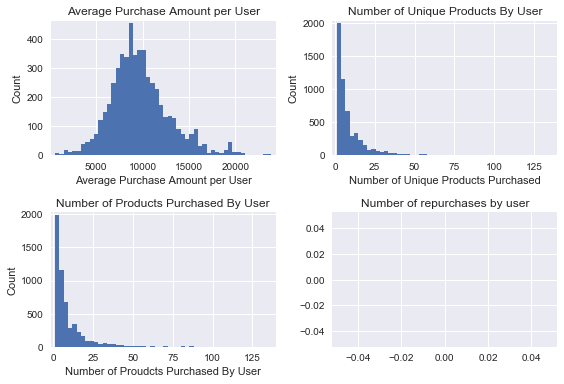

In [385]:
plt.gcf().clear()

# Histogram of average purchase amount by user
plt.subplot(2,2,1)
plt.hist(AverageUserPurchaseAmount, bins = 50)
plt.xlabel('Average Purchase Amount per User')
plt.ylabel('Count')
plt.title('Average Purchase Amount per User')
plt.margins(.02)

# Histogram of number of unique products by user
plt.subplot(2,2,2)
plt.hist(UniqueProductsPerUser, bins = 50)
plt.xlabel('Number of Unique Products Purchased')
plt.ylabel('Count')
plt.title('Number of Unique Products By User')
plt.margins(.02)

# Total number of purchases by user
plt.subplot(2,2,3)
plt.hist(NumberOfPurchasesPerUser, bins = 50)
plt.xlabel('Number of Proudcts Purchased By User')
plt.ylabel('Count')
plt.title('Number of Products Purchased By User')
plt.margins(.02)


# 
plt.subplot(2,2,4)

plt.title('Number of repurchases by user')
plt.margins(.02)

plt.tight_layout()


plt.show()

### Visualization by Gender

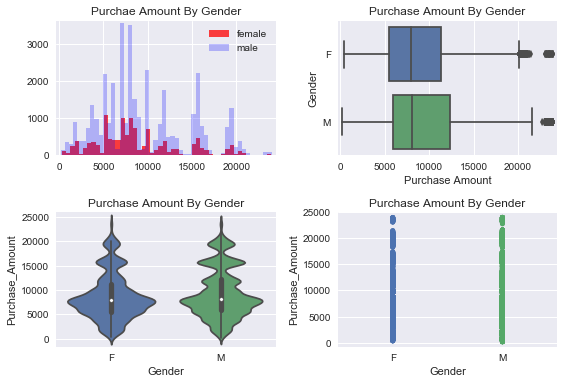

In [388]:
plt.gcf().clear()

#Histogram of purchase amount by gender
female = trainDf[trainDf['Gender'] == 'F']
male = trainDf[trainDf['Gender'] == 'M']
plt.hist(female['Purchase_Amount'], bins = 50, alpha=.5, label='female', color='pink')

plt.subplot(2,2,1)
plt.hist(female['Purchase_Amount'], bins = 50, alpha=.75, label='female', color='red')
plt.hist(male['Purchase_Amount'], bins = 50, alpha=.25, label='male', color='blue')
plt.title('Purchae Amount By Gender')
plt.legend(loc = 'upper right')
plt.margins(.02)

#Box and whiskers of purchase amount by gender
plt.subplot(2,2,2)
sns.boxplot(x = 'Purchase_Amount', y = 'Gender', data=trainDf)
plt.xlabel('Purchase Amount')
plt.ylabel('Gender')
plt.title('Purchase Amount By Gender')
plt.margins(.02)

#Violin plot of purchase amount by gender
plt.subplot(2,2,3)
sns.violinplot(x='Gender', y='Purchase_Amount', data=trainDf)
plt.title('Purchase Amount By Gender')
plt.margins(.02)

# Strip plot of purchase amount by gender
plt.subplot(2,2,4)
sns.stripplot(x= 'Gender', y= 'Purchase_Amount', data = trainDf)
plt.title('Purchase Amount By Gender')
plt.margins(.02)

plt.tight_layout()

plt.show()

In [391]:
# Unable to run swarmplot
sns.swarmplot(x= 'Gender', y= 'Purchase_Amount', data = trainDf)
plt.show()

KeyboardInterrupt: 

In [393]:
def f(row):
    if row['Gender'] == 'M':
        val = 1
    else:
        val = 0
    return val

trainDf['Gender_0_1'] = trainDf.apply(f, axis=1)

plt.subplot(2,1,1)
sns.swarmplot(x= 'Gender_0_1', y= 'Purchase_Amount', data = trainDf)

KeyboardInterrupt: 

### Visualization by Age Range

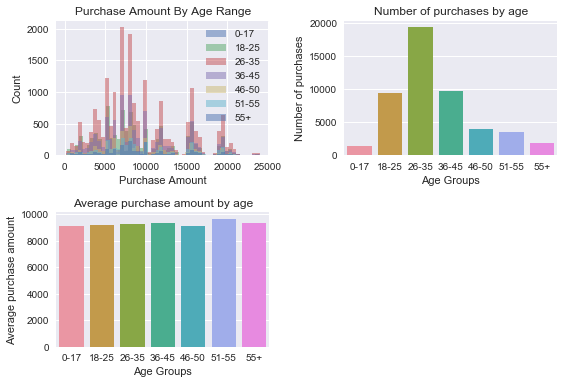

In [396]:
plt.gcf().clear()

plt.subplot(2,2,1)

ages = list(set(trainDf['Age']))
ages.sort()
holdAge = []
for ageRang in ages:
    temp = trainDf[trainDf['Age'] == ageRang]
    holdAge.append(temp)
    plt.hist(temp['Purchase_Amount'], bins=50, alpha=.5, label= ageRang)
    
plt.title('Purchase Amount By Age Range')
plt.xlabel('Purchase Amount')
plt.ylabel('Count')
plt.legend(loc = 'upper right')

plt.subplot(2,2,2)

NumPurchByAge = testDf.groupby(by='Age')['Purchase'].count()
NumPurchByAgeDf = pd.DataFrame(NumPurchByAge)
x= NumPurchByAgeDf.index
x = list(x)
y = list(NumPurchByAgeDf['Purchase'][:])
ax = sns.barplot(x= x, y= y, data=NumPurchByAgeDf)
ax.set(xlabel='Age Groups', ylabel='Number of purchases', title='Number of purchases by age')

plt.subplot(2,2,3)
AvgPurchByAge = testDf.groupby(by='Age')['Purchase'].mean()
x1= AvgPurchByAge.index
AvgPurchByAgeDf = pd.DataFrame(AvgPurchByAge)
x1 = list(x1)
y1 = list(AvgPurchByAgeDf['Purchase'][:])

ax = sns.barplot(x= x1, y= y1, data=AvgPurchByAgeDf)
ax.set(xlabel='Age Groups', ylabel='Average purchase amount', title='Average purchase amount by age')

plt.tight_layout()

plt.show()